Soit la fonction objectif definie pour $x = ( x_{1}, x_{2})  \in    \Re ^{2}$  par :

$J(x) = 3 x_{1}^{2} + 3 x_{2}^{2} - 2 x_{1}x_{2} -3x_{1}-7x_{2} +9$

On cherche un minimiseur dans l'ensemble C = $\big\{ x \in \Re ^{2} :  f_{1}(x) \leq 0,f_{2}(x) \leq 0  \big\}$
avec :
$f_{1}( x_{1}, x_{2}) = x_{1}^{2}+x_{2}^{2} -1$

$f_{2}( x_{1}, x_{2}) = 2x_{1} -1$



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
J = lambda x, y: 3*(x**2)+3*(y**2)-2*(x*y)-3*x-7*y+9
f1 = lambda x, y: x**2+y**2-1
f2 = lambda x, y: 2*x-1

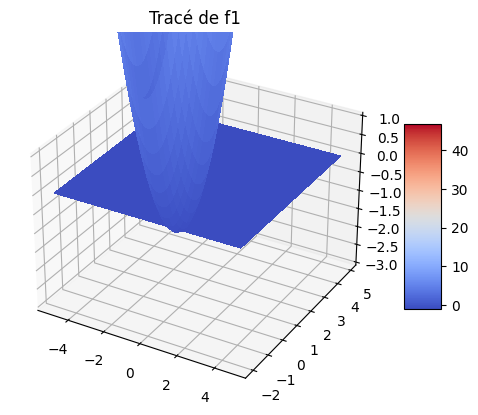

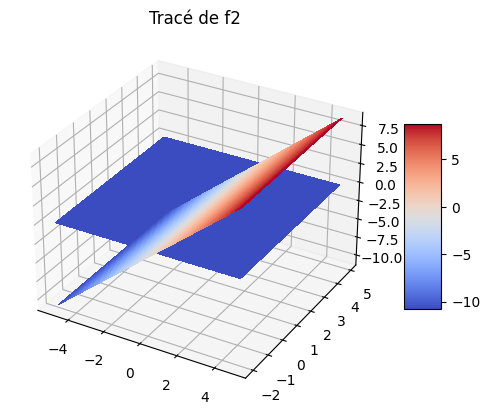

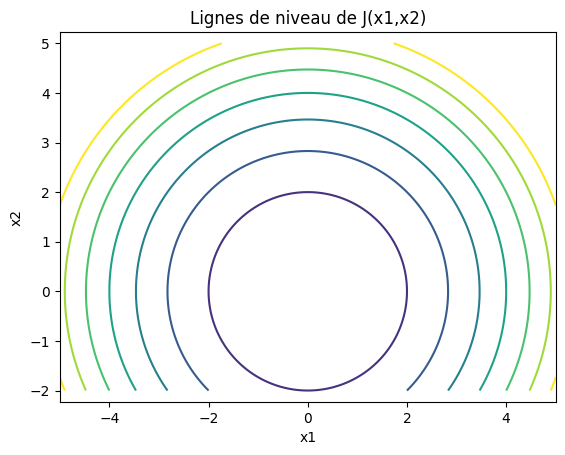

In [10]:
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Function to draw vector fields
def draw_vector_field(F, xmin, xmax, ymin, ymax, N=20):
    X = np.linspace(xmin, xmax, N)  # x coordinates of the grid points
    Y = np.linspace(ymin, ymax, N)  # y coordinates of the grid points
    U, V = F(*np.meshgrid(X, Y))  # vector field
    M = np.hypot(U, V)  # compute the norm of (U,V)
    M[M == 0] = 1  # avoid division by 0
    U /= M  # normalize the u component
    V /= M  # normalize the v component
    return plt.quiver(X, Y, U, V, angles='xy')

# Function to draw level lines
def level_lines(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)

# Define the grid and surfaces
x1 = np.arange(-5, 5, 0.1)
x2 = np.arange(-2, 5, 0.1)
X, Y = np.meshgrid(x1, x2)
Z1 = X**2 + Y**2 - 1
Z2 = 2*X - 1
Zero = X * 0 + Y * 0

# 3D Plot of Z1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Correct way to set up 3D plotting
plt.title("Tracé de f1")
surf = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
surf0 = ax.plot_surface(X, Y, Zero, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-3, 1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# 3D Plot of Z2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Correct way to set up 3D plotting
plt.title("Tracé de f2")
surf2 = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm, linewidth=0, antialiased=False)
surf01 = ax.plot_surface(X, Y, Zero, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf2, shrink=0.5, aspect=5)
plt.show()

# 2D Plot for level lines of J
plt.figure()
def J(x, y):
    return x**2 + y**2  # Example function for J
level_lines(J, -5, 5, -2, 5, np.linspace(0, 28, 8))
plt.ylabel("x2")
plt.xlabel("x1")
plt.title("Lignes de niveau de J(x1,x2)")
plt.axis('equal')
plt.show()


Le minimiseur sur C de J est donné par :
\begin{equation*}
x_{*} =
\begin{pmatrix}
0.5 \\
 \frac{ \sqrt{3} }{2}
\end{pmatrix}
\end{equation*}

In [5]:
g=lambda x1,x2 : np.array([f1(x1,x2),f2(x1,x2)])

In [8]:
def methode_uzawa(l0,alpha=0.1,nIterMax=100):
    """
    Cette fonction calcule le minimiseur de J sous les contraintes définies par C dans $R^{2}$
    Elle a besoin d'un point de départ lambda0 dans $R_{+}^{2}$
    : param l0: 2x1 array [l1,l2].
    : param alpha: pas constant d'itération
    : param nIterMax : int nombre d'itérations avant fin automatique de l'algorithme.
    : return: 2x1 array [x1,x2] (minimiseur de J sur C) , 2x1 array [l1,l2] (lambda associé)
    """

    det = lambda l1,l2:1/((6+2*l1)**2-4)
    A_inv = np.array([[0, 2],
                      [2, 0]])
    B=np.array([[0, 7]])
    l=l0
    A_inv[0,0]=6+2*l[0] ; A_inv[1,1]=6+2*l[1]  # mise à jour de l'inverse A
    B[0,0]=3-2*l[1]                           # mise à jour de B
    x=det(l[0],l[1])*A_inv@B.T  # Calcul de x_k connaissant lambda_k

    tabJ=[J(x[0,0],x[1,0])]
    tabX=[x[0,0]]
    tabY=[x[1,0]]
    k=0
    while k<nIterMax:
        l1,l2=l[0],l[1]
        A_inv[0,0]=6+2*l1 ; A_inv[1,1]=6+2*l1   # mise à jour de l'inverse A
        B[0,0]=3-2*l2                           # mise à jour de B
        x=det(l1,l2)*A_inv@B.T  # Calcul de x_k connaissant lambda_k
        proj=l+alpha*g(x[0,0],x[1,0])
        l=np.where(proj>=0,proj,0)

        tabX.append(x[0,0])
        tabY.append(x[1,0])
        tabJ.append(J(x[0,0],x[1,0]))
        k+=1
    return x,l,tabX,tabY,tabJ

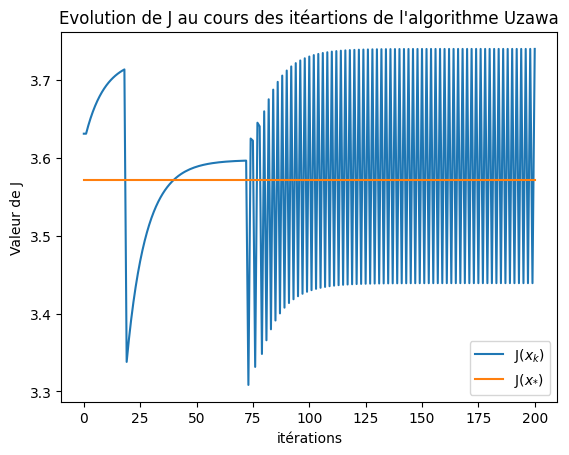

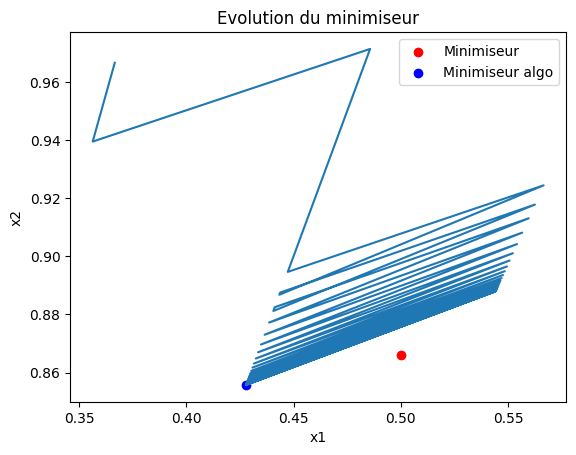

L'algorithme s'arrête en x = 0.4279 0.8557
Vraie valeur du mimimum : 3.5717967803354806
Valeur approchée : 3.740016150937185


In [9]:
l0=np.array([1,1])
nIter=200
alpha=0.1
x,l,tabX,tabY,tabJ=methode_uzawa(l0,nIterMax=nIter,alpha=alpha)

plt.figure()
plt.plot(np.linspace(0,nIter,nIter+1),tabJ,label="J($x_{k}$)")
plt.plot(np.linspace(0,nIter,nIter+1),[3.5717967803354806 for i in range(nIter+1)],label='J($x_{*}$)')
plt.xlabel("itérations")
plt.ylabel("Valeur de J")
plt.title("Evolution de J au cours des itéartions de l'algorithme Uzawa")
plt.legend()
plt.show()

plt.figure()
plt.title("Evolution du minimiseur")
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(tabX,tabY)
plt.scatter([0.5], [0.8660254], color="red",label="Minimiseur")
plt.scatter(x[0,0], x[1,0], color="blue",label="Minimiseur algo")
plt.legend()
plt.show()
print(f"L'algorithme s'arrête en x = {x[0,0].round(4)} {x[1,0].round(4)}")
print(f"Vraie valeur du mimimum : {J(0.5,0.8660254)}")
print(f"Valeur approchée : {J(x[0,0],x[1,0])}")